In [4]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np

In [5]:
# 回帰問題のデータセットを読み込み
data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

In [6]:
df = pd.DataFrame(X, columns=col_names)
# 例として相関の高い特徴量を生成。相関が高いので、どちらかを削除できる
df.loc[:, "MedInc_sqrt"] = df["MedInc"].apply(np.sqrt)
# ピアソンの相関行列
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


In [7]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

# 最小二乗法による線形回帰
model = LinearRegression()
# 再帰的特徴量削減
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X, y)

# データセットを変換
X_transformed = rfe.transform(X)
X_transformed

array([[   8.3252,   37.88  , -122.23  ],
       [   8.3014,   37.86  , -122.22  ],
       [   7.2574,   37.85  , -122.24  ],
       ...,
       [   1.7   ,   39.43  , -121.22  ],
       [   1.8672,   39.43  , -121.32  ],
       [   2.3886,   39.37  , -121.24  ]])

## ランダムフォレスト

In [8]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

# 回帰問題を読み込み
# 1年後の糖尿病の進行度合いを特徴量から予測する問題
data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [9]:
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [10]:
importances = model.feature_importances_
importances

# 係数の大きい順にソート
np.argsort(importances)

array([1, 7, 4, 5, 6, 0, 9, 3, 2, 8], dtype=int64)

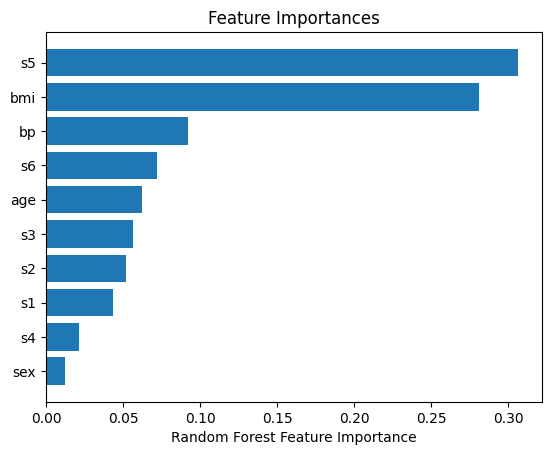

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

idxs = np.argsort(importances)
plt.title("Feature Importances")
plt.barh(range(len(idxs)), importances[idxs], align="center")
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [12]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(estimator=model)
X_transformed = sfm.fit_transform(X, y)
# 選ばれた特徴量のインデックスの boolean 表現
support = sfm.get_support()
# 特徴量名
print([x for x, y  in zip(col_names, support) if y])

['bmi', 's5']
